**------------------ANN Solution------------------**

**Step 1:** Loading dependencies:

The first step is to load in the necessary dependencies, as i will be using these packages to load the training data, and train the models.

In [222]:
#loading dependencies
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:** Loading and previewing the data:

Here i preview the data to get an overview of what it represents. Furthermore i check for missing values and drop the irrelevant coloums.

In [223]:
#load the data
data = pd.read_csv('ai4i2020.csv')
#make data into dataframe
df = pd.DataFrame(data)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [224]:
#check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [225]:
#drop irrelevant columns
df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


**Step 3:** Instantiate Model and Train on Data.

In this step, first the data is split into the test and training parts. I have chosen to do a 80-20 split between train and test data. Furthermore the data is scaled to normalise the features for a better result. Finally i use gridsearch for hyperparameter tuning, where i have chosen some different parameters to loop through which are tested based on accuracy. Some of the parameters are pre-defined due to the nature of the dataset, and from what has been introduced in the course. This includes the solver and the activation type. The parameter tuning will primarily be based on the amount of layers and the size of layers used in the neural network. The tuning focuses on wether the model should use few layers with many neurons or more layers with fewer neurons.

In [257]:
#split the data
x=df.drop('Machine failure', axis=1)
y=df['Machine failure']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scale the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#tuning the hyperparameters
param_grid= {
    'hidden_layer_sizes': [
        (1000,),  # Few layers with many neurons
        (500, 500), (300, 300, 300), (200, 200, 200, 200)  # More layers with fewer neurons
    ],
    'activation': ['relu'],
    'solver': ['adam']
}

mlp = MLPClassifier(max_iter=10)

clf = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, scoring='recall')
#clf = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)
clf.fit(x_train, y_train.values.ravel())

#best parameters
print(clf.best_params_)
print(clf.best_score_)

c:\Users\Emil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


{'activation': 'relu', 'hidden_layer_sizes': (300, 300, 300), 'solver': 'adam'}
0.5579220779220779


c:\Users\Emil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


The found parameters are now used to train the neural network.

In [263]:
#train the neural network
#importing the necessary libraries

model=Sequential()
model.add(Dense(600, activation='relu', input_dim=5))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','recall'])
model.summary()

c:\Users\Emil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 600)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 600)            │       360,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 600)            │       360,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │           601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,401 (2.77 MB)

 Trainable params: 725,401 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [264]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=100)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9234 - loss: 0.2594 - recall: 0.0000e+00 - val_accuracy: 0.9588 - val_loss: 0.1362 - val_recall: 0.0000e+00
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9647 - loss: 0.1118 - recall: 0.0117 - val_accuracy: 0.9588 - val_loss: 0.1165 - val_recall: 0.0000e+00
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9712 - loss: 0.0847 - recall: 0.0942 - val_accuracy: 0.9669 - val_loss: 0.0995 - val_recall: 0.4242
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9761 - loss: 0.0694 - recall: 0.4271 - val_accuracy: 0.9650 - val_loss: 0.0897 - val_recall: 0.1818
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9775 - loss: 0.0636 - recall: 0.3842 - val_accuracy: 0.9675 - val_loss: 0.0811 - val_recall: 0.3636
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9797 - loss: 0.0662 - recall: 0.5643 - val_accuracy: 0.9700 - val_loss: 0.0825 - val_recall: 0.454

**Step 5:** Model evaluation.


[]

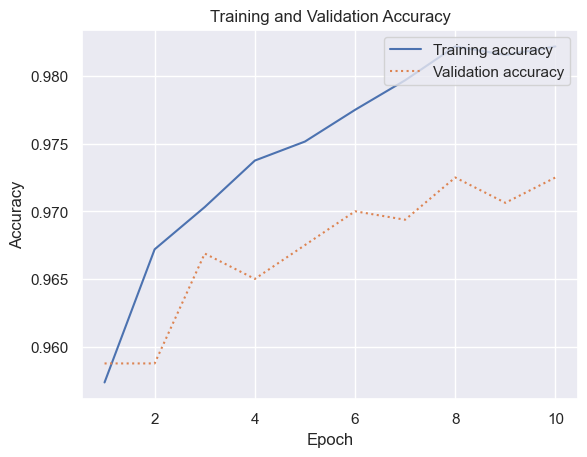

In [265]:
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']  
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.plot()

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0746 - recall: 0.3390     
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


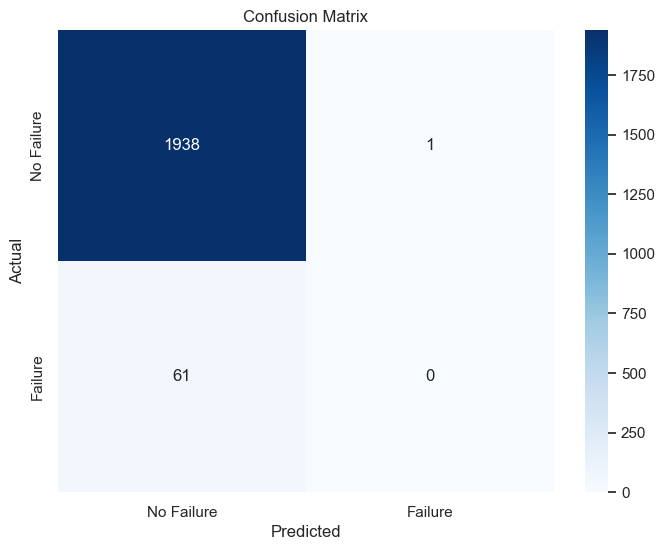

In [266]:
print("Classification Report:\n", classification_report(y_test, y_pred))

model.evaluate(x_test, y_test)

model.predict(x_test)

y_pred_classes = (y_pred > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix


# Assuming y_test and y_pred_classes are defined
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
